# Project Phase II: Anna Asch (aca89) and Anna Clemson (aac64)

### Research Question(s)
1. In the post-steroid era, were the most successful teams built with elite hitting, pitching, or fielding? Based on data that represents quality, is it more valuable to score runs or prevent runs? Is a run scored really the same as a run prevented?
2. Although all of this data is from the same "era," there is no doubt that the game has changed within this era. Does data support the idea that the make-up of the most successful teams has changed in the last 15 years or so? (By make-up we mean, for example, has hitting become more important?)

Although there is existing research on these topics, most of it is outdated or analyzes the run totals and other basic statistics like batting average, which are widely regarded as not being great measures of a player's actual quality. We aim to explore if beyond just runs, quality offense, quality pitching, or quality fielding is more valuable for a team's success (i.e., OPS for hitting or FIP for pitching).

### Data Cleaning

To begin we needed to import the pandas and numpy packages to allow us to perform all of the changes we needed on our data.

In [1]:
import pandas as pd
import numpy as np

Our first step in cleaning the data was to import 8 `.csv` files that we downloaded from [fangraphs.com](fangraphs.com). Using FanGraphs, we specified that we wanted team data for the years 2006-2019 and then downloaded `.csv` files of their compilations of various hitting, pitching, and fielding data using their dashboard, standard, and advanced categories. We created dataframes for each of these so that we could clean the data in Python.

In [2]:
hitting_dashboard = pd.read_csv('hitting_dashboard.csv')
hitting_standard = pd.read_csv('hitting_standard.csv')
hitting_advanced = pd.read_csv('hitting_advanced.csv')
pitching_dashboard = pd.read_csv('pitching_dashboard.csv')
pitching_standard = pd.read_csv('pitching_standard.csv')
pitching_advanced = pd.read_csv('pitching_advanced.csv')
fielding_dashboard = pd.read_csv('fielding_dashboard.csv')
fielding_advanced = pd.read_csv('fielding_advanced.csv')

Then we selected which columns we wanted to include from the three hitting dataframes we created from the FanGraphs data. They include a lot of statistics in their datasheets, but we are only going to look at some in our analysis. Additionally, there are some redundancies across these dataframes (like `PA`), so we also want to ensure that we eliminate those. We left each of these dataframes with the 'Season' and 'Team' columns so that we can combine them later.

In [3]:
hitting_dashboard = hitting_dashboard.drop(columns=['G', 'SB', 'BABIP', 'EV', 'BsR', 'Off', 'Def'])
hitting_standard = hitting_standard[['Season', 'Team', 'H']]
hitting_advanced = hitting_advanced[['Season', 'Team', 'OPS']]

Next, we repeated that process with the three pitching dataframes we created from the FanGraphs data. We first selected the columns we wanted to include, since again we are only going to look at some of this data in our analysis. Additionally, there are some redundancies across these dataframes (like `ERA`), so we also wanted to ensure that we eliminated those. We left each of these dataframes with the 'Season' and 'Team' columns so that we can combine them later.

In [4]:
pitching_dashboard = pitching_dashboard.drop(columns=['G', 'K/9', 'BB/9', 'HR/9', 'BABIP', 'LOB%', 'GB%', 'HR/FB', 'EV','xFIP'])
pitching_standard = pitching_standard[['Season', 'Team', 'SV', 'IP', 'H', 'R', 'ER', 'HR', 'BB', 'SO']]
pitching_advanced = pitching_advanced[['Season', 'Team', 'K%', 'BB%', 'WHIP']]

After that we selected which columns we wanted to include from the two fielding dataframes we created from the FanGraphs data. As before, we are only going to look at some of this data in our analysis. This is especially true for fielding, since a lot of fielding statistics are closely related, and some reflect overall team defense better than others. There are some redundancies across these dataframes, although none of the data we wanted was repeated in this case. Both of the dataframes still include the 'Season' and 'Team' column so that we can combine them later.

In [5]:
fielding_dashboard = fielding_dashboard[['Season', 'Team', 'FP']]
fielding_advanced = fielding_advanced[['Season', 'Team', 'DRS', 'UZR']]

FanGraphs data uses different names in the `Team` category for the data they collected for the fielding statistics (this is in our fielding_dashboard and fielding_advanced dataframes). We had to convert these names to be the same as what is used across the other dataframes to distinguish teams, which is a conventional three letter abbreviation. We did this by creating a dictionary with the needed changes for all 30 teams and then passing that through both of the fielding dataframes with the `.replace()` method.

In [6]:
team_name_dictionary = {'Angels': 'LAA', 'Braves': 'ATL', 'Astros': 'HOU', 'Athletics': 'OAK', 
                        'Blue Jays': 'TOR', 'Royals': 'KCR', 'Tigers': 'DET', 'Twins': 'MIN', 
                        'White Sox': 'CHW', 'Yankees': 'NYY', 'Brewers': 'MIL', 'Cardinals': 'STL', 
                        'Cubs': 'CHC', 'Devil Rays': 'TBR', 'Diamondbacks': 'ARI', 'Dodgers': 'LAD', 
                        'Giants': 'SFG', 'Indians': 'CLE', 'Mariners': 'SEA', 'Marlins': 'MIA', 
                        'Mets': 'NYM', 'Nationals': 'WSN', 'Orioles': 'BAL', 'Padres': 'SDP', 
                        'Phillies': 'PHI', 'Pirates': 'PIT', 'Rangers': 'TEX', 'Red Sox': 'BOS',
                        'Reds': 'CIN', 'Rockies': 'COL', 'Rays': 'TBR'}
fielding_dashboard = fielding_dashboard.replace(team_name_dictionary, value=None)
fielding_advanced = fielding_advanced.replace(team_name_dictionary, value=None)

There was also an inconsistency with the way two teams were named because they rebranded during the time frame that we are using. The Miami Marlins (`MIA`) used to be the Florida Marlins (`FLA`) and the Tamba Bay Rays (`TBR`) used to be the Tampa Bay Devil Rays (`TBD`). These are the same franchises so we wanted to call them by the same name in our data. We already fixed this in the fielding dataframes based on how we constructed our dictionary, but we had to resolve these inconsistencies in the remaining dataframes. To do so, we created a new dictionary, and passed it through the rest of the dataframes with the `.replace()` method.

In [7]:
florida_renames = {'FLA': 'MIA', 'TBD': 'TBR'}
hitting_dashboard = hitting_dashboard.replace(florida_renames, value=None)
hitting_standard = hitting_standard.replace(florida_renames, value=None)
hitting_advanced = hitting_advanced.replace(florida_renames, value=None)
pitching_dashboard = pitching_dashboard.replace(florida_renames, value=None)
pitching_standard = pitching_standard.replace(florida_renames, value=None)
pitching_advanced = pitching_advanced.replace(florida_renames, value=None)

In order to combine all of our dataframes, we needed to make sure that all of the data was in the same order so we could concatenate across and include the proper data for each team in their respective row. In order to do this we sorted our data in each dataframe by `Season` (chronologically) and then by `Team` (alphabetically). We then reset the index and dropped the index column to ensure that we didn't have any unnecessary columns and all of our data was in order.

In [8]:
hitting_dashboard = hitting_dashboard.sort_values(by=['Season', 'Team']).reset_index().drop(columns='index')
hitting_standard = hitting_standard.sort_values(by=['Season', 'Team']).reset_index().drop(columns='index')
hitting_advanced = hitting_advanced.sort_values(by=['Season', 'Team']).reset_index().drop(columns='index')
pitching_dashboard = pitching_dashboard.sort_values(by=['Season', 'Team']).reset_index().drop(columns='index')
pitching_standard = pitching_standard.sort_values(by=['Season', 'Team']).reset_index().drop(columns='index')
pitching_advanced = pitching_advanced.sort_values(by=['Season', 'Team']).reset_index().drop(columns='index')
fielding_dashboard = fielding_dashboard.sort_values(by=['Season', 'Team']).reset_index().drop(columns='index')
fielding_advanced = fielding_advanced.sort_values(by=['Season', 'Team']).reset_index().drop(columns='index')

With our dataframes were properly sorted, we were able to concatenate the data by category (hitting, pitching, and fielding). We combined everything later, but keeping the hitting, pitching, and fielding dataframes separate at this point allowed us to more easily keep track of certain columns in the subsequent renaming step. In order to combine each category, we used the `pd.concat()` method and specficied to concatenate along `axis = 1` in order to "smoosh" together the columns. Additionally, we previously had columns representing the season and the team in each of the 2 or 3 dataframes for each category to ensure that the observations were ordered the same in each of the dataframes; following the concatenation we had duplicates of that information, so we eliminated those with the `.duplicated()` method.

In [9]:
hitting = pd.concat([hitting_dashboard, hitting_standard, hitting_advanced], axis=1)
hitting = hitting.loc[:,~hitting.columns.duplicated()]

pitching = pd.concat([pitching_dashboard, pitching_standard, pitching_advanced], axis=1)
pitching = pitching.loc[:,~pitching.columns.duplicated()]

fielding = pd.concat([fielding_dashboard, fielding_advanced], axis=1)
fielding = fielding.loc[:,~fielding.columns.duplicated()]

Once we made the larger hitting, pitching, and fielding dataframes, we renamed our columns to make them easier to work with later on. The first step for all of our new dataframes was to make the column names lowercase which we did with `colname.lower()`. Then we needed to specify name changes for certain columns which had ambiguous titles, could be confused between hitting and pitching stats, or had problematic characters like % and +. In the case of overlapping statistics (like `H`) we clarified `hit_hits` and `pitch_hits` so we would know to whom those columns belonged.

In [10]:
hitting_lower = [colname.lower() for colname in hitting.columns]
hitting.columns = hitting_lower;
hitting = hitting.rename(columns = {'hr':'hit_hr', 'r':'runs_scored', 'bb%':'hit_bb_rate', 'k%':'hit_k_rate', 
                                    'avg':'bat_avg', 'wrc+':'wrc_plus', 'war':'hit_fwar', 'h':'hit_hits'})

pitching_lower = [colname.lower() for colname in pitching.columns]
pitching.columns = pitching_lower;
pitching = pitching.rename(columns = {'w':'wins', 'l':'losses', 'sv':'saves', 'gs':'games', 'war':'pitch_fwar', 
                                      'h':'pitch_hits', 'r':'runs_allowed', 'hr': 'pitch_hr', 'k%':'pitch_k_rate', 
                                      'bb%':'pitch_bb_rate', 'bb':'pitch_bb','so':'pitch_so'})

fielding_lower = [colname.lower() for colname in fielding.columns]
fielding.columns = fielding_lower;

Finally, we were ready to concatenate all of the data. We followed a similar process to that in which we concatenated all of the hitting/pitching/fielding data separately, but this time we made one big dataframe with all data we would want to access. We followed a similar process to eliminate the duplicated columns (team and season).

In [11]:
baseball_data = pd.concat([hitting, pitching, fielding], axis=1)
baseball_data = baseball_data.loc[:,~baseball_data.columns.duplicated()]

Then we wanted to make sure our data was in a format that we will be able to work with. Some of our data was stored as objects that represented percents, but we want to manipulate those as floats. These columns were all with `rate` in the title (i.e. `pitch_k_rate`). Below, we converted all of these columns to floats. To do this we specified them as strings, eliminated the % sign, converted that value to a float, and divided by 100 (since we want them as a decimal representing a rate).

In [12]:
baseball_data.loc[:,'hit_bb_rate'] = baseball_data.loc[:,'hit_bb_rate'].str.rstrip('%').astype('float') / 100.0
baseball_data.loc[:,'hit_k_rate'] = baseball_data.loc[:,'hit_k_rate'].str.rstrip('%').astype('float') / 100.0
baseball_data.loc[:,'pitch_k_rate'] = baseball_data.loc[:,'pitch_k_rate'].str.rstrip('%').astype('float') / 100.0
baseball_data.loc[:,'pitch_bb_rate'] = baseball_data.loc[:,'pitch_bb_rate'].str.rstrip('%').astype('float') / 100.0

Although we already have data on wins, a team's success is often determined by win percentage (which is what is used when determining playoff teams). Teams usually play the same number of games (162) but there is a chance for slight variation. In order to include this, we added a column called `win_pct` which we calculated using `wins` and `games`. Similarly, we created a run differential column called `run_diff` using `runs_scored` and `runs_allowed` because this is a quick way to tell whether a team's offense produced more or their pitching/fielding produced less throughout the season. Although we want to stick with specific quality analysis when answering our research questions, this is a good diagnostic statistic to potentially use as a measure of success. 

In [13]:
baseball_data['win_pct'] = baseball_data['wins']/baseball_data['games']
baseball_data['run_diff'] = baseball_data['runs_scored'] - baseball_data['runs_allowed']

This next line saves our cleaned data to `baseball_data.csv`, when uncommented.

In [14]:
#baseball_data.to_csv('baseball_data.csv')

Here is our cleaned data:

In [15]:
display(baseball_data)

,season,team,pa,hit_hr,runs_scored,rbi,hit_bb_rate,hit_k_rate,iso,bat_avg,...,pitch_bb,pitch_so,pitch_k_rate,pitch_bb_rate,whip,fp,drs,uzr,win_pct,run_diff
0,2006,ARI,6330,160,773,743,0.080,0.152,0.157,0.267,...,536,1115,0.176,0.085,1.40,0.983,5,-27.7,0.469136,-15
1,2006,ATL,6284,222,849,818,0.084,0.186,0.184,0.270,...,572,1049,0.165,0.090,1.46,0.984,-13,10.0,0.487654,44
2,2006,BAL,6240,164,768,727,0.076,0.141,0.146,0.277,...,613,1016,0.161,0.097,1.54,0.983,-13,4.8,0.432099,-131
3,2006,BOS,6435,192,820,777,0.104,0.164,0.166,0.269,...,509,1070,0.170,0.081,1.44,0.989,-57,-21.9,0.530864,-5
4,2006,CHC,6147,166,716,677,0.064,0.151,0.154,0.268,...,687,1250,0.196,0.108,1.45,0.982,-16,31.2,0.407407,-118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,2019,STL,6167,210,764,714,0.091,0.230,0.170,0.245,...,545,1399,0.231,0.090,1.27,0.989,91,32.8,0.561728,102
416,2019,TBR,6285,217,769,730,0.086,0.238,0.178,0.254,...,453,1621,0.266,0.074,1.17,0.985,53,-2.1,0.592593,113
417,2019,TEX,6204,223,810,765,0.086,0.254,0.183,0.248,...,583,1379,0.217,0.092,1.46,0.982,-52,-11.1,0.481481,-68
418,2019,TOR,6091,247,726,697,0.084,0.249,0.192,0.236,...,604,1332,0.211,0.096,1.43,0.984,0,-24.9,0.413580,-102


### Data Description

**What are the observations (rows) and the attributes (columns)?**

Each row represents one season for one Major League Baseball team. The seasons range from 2006 to 2019. Each of the 30 MLB teams has data for each of these years, making a total of 420 observations.

Each column represents a particular baseball statistic, averaged or summed over all players on a team, depending on the statistic. Here is a chart which describes the meaning of each column in our dataset:

| Variable Name | Description |
| --- | --- |
| season | Year |
| team | Name of the team |
| pa | Number of plate appearances |
| hit_hr | Number of home runs hit |
| runs_scored | Number of runs scored |
| rbi | Number of runs batted in |
| hit_bb_rate | Walk rate for hitters |
| hit_k_rate | Strikeout rate for hitters |
| iso | Isolated Power: represents batters' raw power based on extrabase hits |
| bat_avg | Batting average |
| obp | On-base percentage |
| slg | Slugging percentage: Average number of bases earned per at bat |
| woba | Weighted on-base average: a version of obp that takes into account how a batter got on base (values power power more) |
| wrc_plus | Weighted runs created plus: takes runs created (estimated offensive contribution) and adjusts for external factors |
| hit_fwar | FanGraphs Wins Above Replacement for hitters: measures a hitter's overall contribution to a team's wins (this includes defense, but excludes pitchers) |
| hit_hits | Number of hits (by batters) |
| ops | On-base percentage plus slugging |
| wins | Team's total wins |
| losses | Team's total losses |
| saves | Number of saves (pitching) |
| games | Number of games played |
| ip | Number of innings pitched |
| era | Earned run average |
| fip | Fielding independent pitching: similar to ERA but uses only the outcomes a pitcher has complete control over (HR, K, BB, HBP)|
| pitch_fwar | FanGraphs Wins Above Replacement for pitchers: measures hitter's overall contribution to a team's wins |
| pitch_hits | Hits allowed |
| runs_allowed | Runs allowed |
| er | Number of earned runs allowed |
| pitch_hr | Number of home runs allowed |
| pitch_bb | Number of walks allowed |
| pitch_so | Number of strikeouts by pitchers |
| pitch_k_rate | Strikeout rate for pitchers |
| pitch_bb_rate | Walk rate for pitchers |
| whip | Walks plus hits per innings pitched |
| fp | Fielding percentage |
| drs | Defensive runs saved |
| uzr | Ultimate zone rating: quantifies defensive performance by measuring runs saved, but using a different formula than DRS|
| win_pct | Win percentage (reported as a decimal) |
| run_diff | Run differential: runs scored - runs allowed |

Overall, the columns include information on hitting, pitching, and fielding, in addition to a few measures of overall team performance.

Source for some definitions: [MLB website](https://www.mlb.com/glossary/)

**Why was this dataset created?**

We created this dataset to aggregate various statistics for all Major League Baseball teams from 2006 to 2019. We chose to take data starting in 2006 because it is considered to be the first season in the start of the current "Post-Steroid Era" according to Dr. Michael Woltring et al. in [_The Sport Journal_](https://thesportjournal.org/article/examining-perceptions-of-baseballs-eras/). Also, although data exists from the 2020 season, teams played fewer games than usual in 2020, and there were some rule changes specifically related to the COVID-19 pandemic, as detailed in [the MLB's announcement of the 2020 season](https://www.mlb.com/news/mlb-announces-2020-regular-season). For this reason, our dataset ends with the 2019 season. 

Our dataset contains data not only about one aspect of baseball (i.e., pitching, fielding, or hitting), but combines information about all of these aspects into one dataset. This is useful because the intended use of this dataset is to analyze the relative importance of pitching, fielding, and hitting (three different aspects in which a team can invest) to a team's success.

**Who funded the creation of the dataset?**

The raw data which makes up our dataset comes from [fangraphs.com](fangraphs.com), a baseball statistics and analytics website. FanGraphs is funded by individual membership subscriptions, and collects and maintains their data for baseball fans. Their website provides an easy-to-use interface for users to filter data by team, year, and other aspects, after which users can easily compare statistics of interest. FanGraphs obtains their data from various sources. According to their website, "All major league baseball data including pitch type, velocity, batted ball location, and play-by-play data [is] provided by Sports Info Solutions;" and "Major League and Minor League Baseball data [is] provided by Major League Baseball."

**What processes might have influenced what data was observed and recorded and what was not?**

In general, Major League Baseball, Sports Info Solutions, and by proxy FanGraphs are very thorough in their data collection as they include all games for all teams in their data. Due to the nature of the availability of data in baseball in the twenty-first century, the data observed should be complete and unbiased. This means that the information that is missing is largely data we have chosen to omit, we were unable to include, or which are unmeasurable. For example, we did not include any statistics that require technology to gather, like [Statcast](https://www.mlb.com/glossary/statcast) data, which includes measurements such as exit velocity (how fast a ball is hit by a hitter). While this limits the information available in our dataset, that kind of data was not collected across the entire era which we are examining, so our dataset instead focuses on statistics that are collected (or calculated) in the more traditional way. 

The biggest influence on the data which is unaccounted for is park effects for certain teams. For example, the Colorado Rockies play half their games every season at Coors Field, which is at altitude (almost a mile above sea level). Therefore, they might have more offense and their pitchers might allow more runs because of the location of their field. However, we expect to still be able to detect whether their pitching or hitting played a more important role using statistics from our dataset like run differential or win percentage. Nevertheless, data generated by games played at parks with these extreme effects may still be outliers, and our dataset does not have information to account for this.

**What preprocessing was done, and how did the data come to be in the form that you are using?**

The preprocessing that was done is described in more detail in our Data Cleaning section. However, here is a summary. We downloaded 8 `.csv` files from [fangraphs.com](fangraphs.com): 3 for hitting, 3 for pitching, and 2 for fielding. Each of these `.csv` files contained 420 observations, one for each Major League Baseball team across the years 2006 - 2019. We dropped overlapping columns and those not needed for our data analysis, and renamed the remaining columns to make them more indicative of their contents and to eliminate ambiguity (e.g., between runs scored and runs allowed). Some of the team naming was inconsistent, so we also renamed some of the observations to restore consistency. We also changed some of the columns to numeric values from strings. Eventually, we combined information from all 8 dataframes together to obtain our final dataset. You can find details about accessing the raw source data from FanGraphs and our processed dataset below.

**If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for?**

The data does originate from people. However, the observations in our dataset are aggregated across entire Major League Baseball teams, so no data is specifically tied to a person. Major League Baseball has a lot of data in the public domain, and the baseball players who played in the games that generated this data were aware of the data collection. In general, players know that there is no limitation on what baseball data will be used for. They are aware that it is generally intended for baseball researchers to learn about trends in the game and compare players and teams to each other.

**Where can your raw source data be found, if applicable? Provide a link to the raw data (hosted in a Cornell Google Drive or Cornell Box).**

Our raw source data can be found in this [Cornell Google Drive folder](https://drive.google.com/drive/folders/1uDGY4ISnM3rEx5NPR95Btq6YsGBkI9nJ?usp=sharing). Our cleaned data is named `baseball_data.csv`, and the raw source data form which we obtained the cleaned data is the 8 other `.csv` files.

### Data Limitations
- One limitation is an inability to control for park factors within this data. For example, the Colorado Rockies play in Denver which is at altitude and thus ball movement is affected. Anecdotally, this means that hitters tend to display more power in Colorado and pitchers tend to struggle more. Data in other research supports this, but it will be interesting to see how that shows up in our analysis. Depending on what statistics we use, it is possible that these stats will balance out within the team data, but looking at isolated hitting and pitching stats we would see more extremes since the Rockies play half their games in their own ballpark. Less extreme park effects may also come into play since some parks are termed "pitcher" parks and others are referred to as "hitter" parks (["Ranking MLB's Most Hitter-Friendly Ballparks, by the Numbers"](https://bleacherreport.com/articles/2022901-ranking-mlbs-most-hitter-friendly-ballparks-by-the-numbers)). We may want to analyze our data in such a way as to see how justified these terms are when applied to certain teams. A team like the Brewers who play at Miller Park (considered a good hitter park), might want to focus more on developing a strong offense where as a team in a pitcher park might want to develop a strong rotation. Or perhaps since these effects impact both teams in a game it wouldn't matter. This might mean that some teams should take our conclusions with a grain of salt if their home ballpark is better suited for hitters/pitchers. Regardless, it seems that park factors may limit our ability to distinguish some trends across teams. A notable exception is we will almost certainly use wRC+ in our analysis, which does account for external factors. This may help us reduce issues with this limitation.

- We also do not have any data about strength of schedule. This means that we will not be able to account for offense being suppressed because a team may have had to play against a particularly strong pitching rotation more often than a weak pitching rotation. To give an example from this year, the San Diego Padres will have to play a lot more against the Los Angeles Dodgers, who have one of the best starting rotations in MLB right now, than they will the Baltimore Orioles, who do not have that great of a starting rotation at the moment. This also would apply to pitchers facing particularly formidable line ups. That being said, we are looking at a lot of teams and MLB does try to craft fair schedules for teams, so we hope that this balances out across our data. Nevertheless, that is an assumption we are making. A notable exception is we will almost certainly use wRC+ in our analysis, which does account for external factors. This may help us reduce issues with this limitation.

- A third limitation is related the limitation above about strength of schedule, but this one stems from the nature of how MLB schedules are built in terms of the teams that one plays (strength of those teams aside). Teams play a plurality of their games within their own division and a majority of games (including that plurality) within their own league ([wikipedia.org/wiki/Major_League_Baseball_schedule](https://en.wikipedia.org/wiki/Major_League_Baseball_schedule)). MLB is divided into two leagues, the American League (AL) and the National League (NL). The leagues are essentially the same, but in the AL they have a designated hitter (DH) who bats for the pitcher whereas in the NL the pitcher still bats (for now - this will probably change in the coming seasons). This means that on average we would expect AL teams to probably net more offense, but we should still be able to get an idea of relative strength of offense and defense within a team. Also although this effect is noticeable, it should not be so big that we cannot say anything about the importance of offense vs. pitching vs. fielding for an MLB team. When an AL team plays an NL team, they obviously abide by the same rules (i.e., they both have a DH or neither does) depending on who the home team is. That means that there is never any disparity within a game. That being said, we still may see AL teams tend to have more offense and NL teams tend to have more dominant pitching. However, this effect should not be overpowering and we should still be able to tell whether offense or defense is more valuable. Also, within the trends of individual teams, this will not matter with the exception of the Houston Astros who switched to the AL in 2013 ([wikipedia.org/wiki/Houston_Astros](https://en.wikipedia.org/wiki/Houston_Astros)). A notable exception is we will almost certainly use wRC+ in our analysis, which does account for external factors. This may help us reduce issues with this limitation.

### Exploratory Data Analysis

In [16]:
print('Mean values for all columns in our dataframe:')
print(baseball_data.loc[:,baseball_data.columns != 'season'].mean())

print('\nStandard deviation for all columns in our dataframe:')
print(baseball_data.loc[:,baseball_data.columns != 'season'].std())

Mean values for all columns in our dataframe:
pa               6191.273810
hit_hr            171.890476
runs_scored       726.533333
rbi               692.357143
hit_bb_rate         0.082821
hit_k_rate          0.196393
iso                 0.154990
bat_avg             0.257062
obp                 0.324036
slg                 0.412060
woba                0.320033
wrc_plus           96.376190
hit_fwar           18.998810
hit_hits         1423.266667
ops                 0.736055
wins               80.985714
losses             80.985714
saves              40.938095
games             161.976190
ip               1446.556905
era                 4.177024
fip                 4.176810
pitch_fwar         14.331429
pitch_hits       1423.266667
runs_allowed      726.533333
er                671.109524
pitch_hr          171.890476
pitch_bb          513.378571
pitch_so         1214.885714
pitch_k_rate        0.196488
pitch_bb_rate       0.082833
whip                1.338810
fp                  0.9838

In [17]:
by_season = baseball_data.groupby(by='season')

print('Summary statistics of winning percentage by season:')
print(by_season.win_pct.describe().round(4))

print('\nSummary statistics of runs scored by season:')
print(by_season.runs_scored.describe().round(2))

print('\nSummary statistics of runs allowed by season:')
print(by_season.runs_allowed.describe().round(2))

Summary statistics of winning percentage by season:
        count    mean     std     min     25%     50%     75%     max
season                                                               
2006     30.0  0.5000  0.0622  0.3765  0.4691  0.4938  0.5432  0.5988
2007     30.0  0.5000  0.0572  0.4074  0.4460  0.5093  0.5453  0.5926
2008     30.0  0.5000  0.0682  0.3665  0.4568  0.5123  0.5485  0.6173
2009     30.0  0.5000  0.0704  0.3642  0.4583  0.5170  0.5417  0.6358
2010     30.0  0.5000  0.0679  0.3519  0.4645  0.5000  0.5556  0.5988
2011     30.0  0.5000  0.0705  0.3457  0.4444  0.4954  0.5556  0.6296
2012     30.0  0.5000  0.0737  0.3395  0.4460  0.5062  0.5694  0.6049
2013     30.0  0.5000  0.0754  0.3148  0.4568  0.5123  0.5670  0.5988
2014     30.0  0.5000  0.0593  0.3951  0.4506  0.4969  0.5432  0.6049
2015     30.0  0.5000  0.0645  0.3889  0.4575  0.5016  0.5417  0.6173
2016     30.0  0.4998  0.0659  0.3642  0.4414  0.5093  0.5463  0.6358
2017     30.0  0.5000  0.0712  0.3951 

In [18]:
print('Summary statistics of OPS by season:')
print(by_season.ops.describe().round(3))

print('\nSummary statistics of FIP by season:')
print(by_season.fip.describe().round(3))

print('\nSummary statistics of DRS by season:')
print(by_season.drs.describe().round(3))

Summary statistics of OPS by season:
        count   mean    std    min    25%    50%    75%    max
season                                                        
2006     30.0  0.768  0.025  0.723  0.749  0.767  0.783  0.824
2007     30.0  0.758  0.031  0.708  0.738  0.754  0.775  0.829
2008     30.0  0.749  0.032  0.686  0.730  0.752  0.768  0.816
2009     30.0  0.750  0.032  0.699  0.727  0.747  0.772  0.839
2010     30.0  0.728  0.036  0.637  0.702  0.732  0.756  0.790
2011     30.0  0.719  0.042  0.640  0.692  0.716  0.738  0.810
2012     30.0  0.724  0.032  0.665  0.702  0.716  0.749  0.790
2013     30.0  0.714  0.034  0.627  0.692  0.712  0.736  0.795
2014     30.0  0.700  0.030  0.634  0.684  0.693  0.714  0.772
2015     30.0  0.721  0.025  0.674  0.704  0.721  0.739  0.797
2016     30.0  0.739  0.029  0.685  0.724  0.734  0.756  0.810
2017     30.0  0.750  0.030  0.689  0.732  0.750  0.770  0.823
2018     30.0  0.727  0.034  0.659  0.704  0.728  0.752  0.792
2019     30.0  0.7

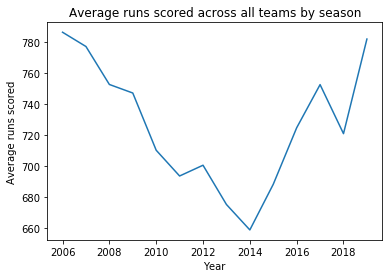

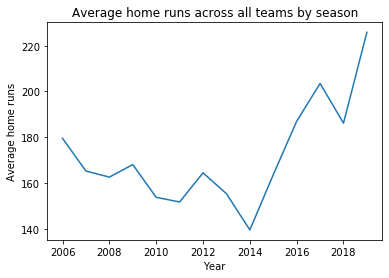

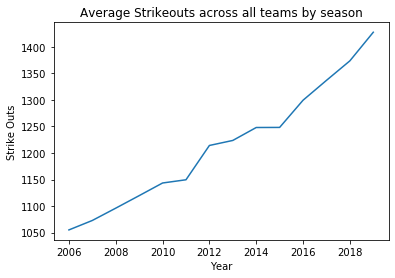

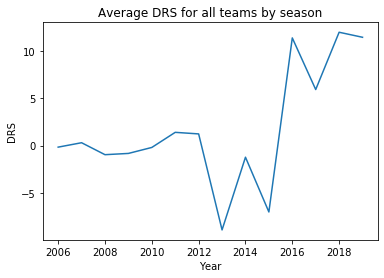

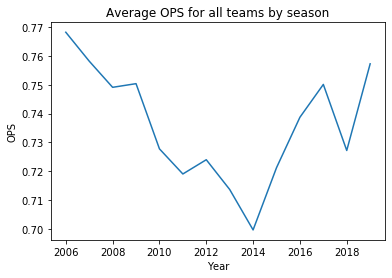

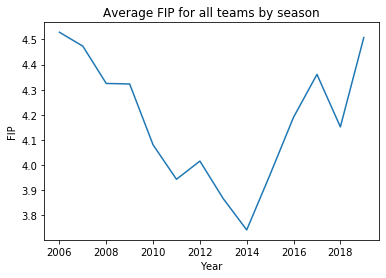

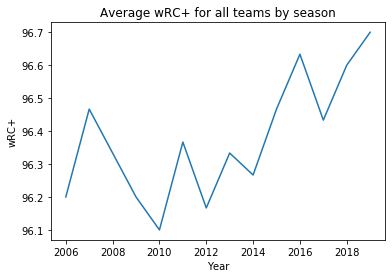

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

runs_tot = by_season['runs_scored'].mean()
plt.plot(range(2006,2020), runs_tot)
plt.xlabel('Year')
plt.ylabel('Average runs scored')
plt.title('Average runs scored across all teams by season')
plt.show()

hr_tot = by_season['hit_hr'].mean()
plt.plot(range(2006,2020), hr_tot)
plt.xlabel('Year')
plt.ylabel('Average home runs')
plt.title('Average home runs across all teams by season')
plt.show()

k_avg = by_season['pitch_so'].mean()
plt.plot(range(2006,2020), k_avg)
plt.xlabel('Year')
plt.ylabel('Strike Outs')
plt.title('Average Strikeouts across all teams by season')
plt.show()

drs_avg = by_season['drs'].mean()
plt.plot(range(2006,2020), drs_avg)
plt.xlabel('Year')
plt.ylabel('DRS')
plt.title('Average DRS for all teams by season')
plt.show()

ops_avg = by_season['ops'].mean()
plt.plot(range(2006,2020), ops_avg)
plt.xlabel('Year')
plt.ylabel('OPS')
plt.title('Average OPS for all teams by season')
plt.show()

fip_avg = by_season['fip'].mean()
plt.plot(range(2006,2020), fip_avg)
plt.xlabel('Year')
plt.ylabel('FIP')
plt.title('Average FIP for all teams by season')
plt.show()

wrc_plus_avg = by_season['wrc_plus'].mean()
plt.plot(range(2006,2020), wrc_plus_avg)
plt.xlabel('Year')
plt.ylabel('wRC+')
plt.title('Average wRC+ for all teams by season')
plt.show()

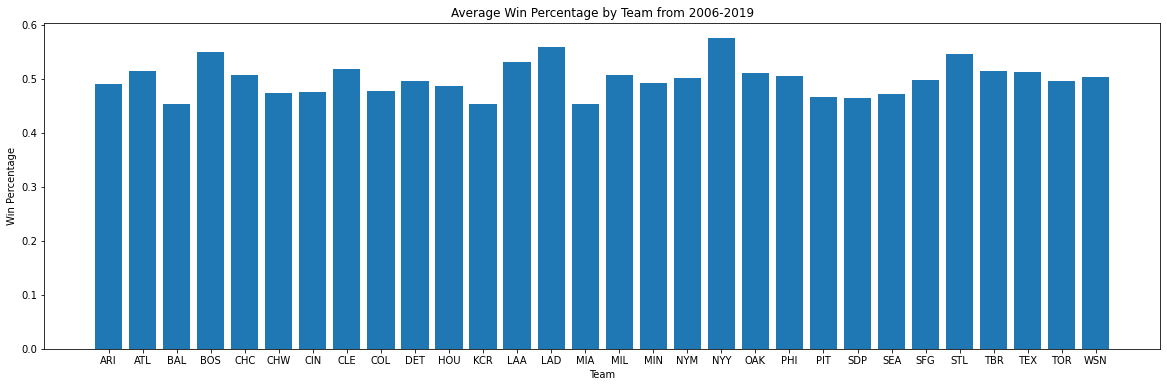

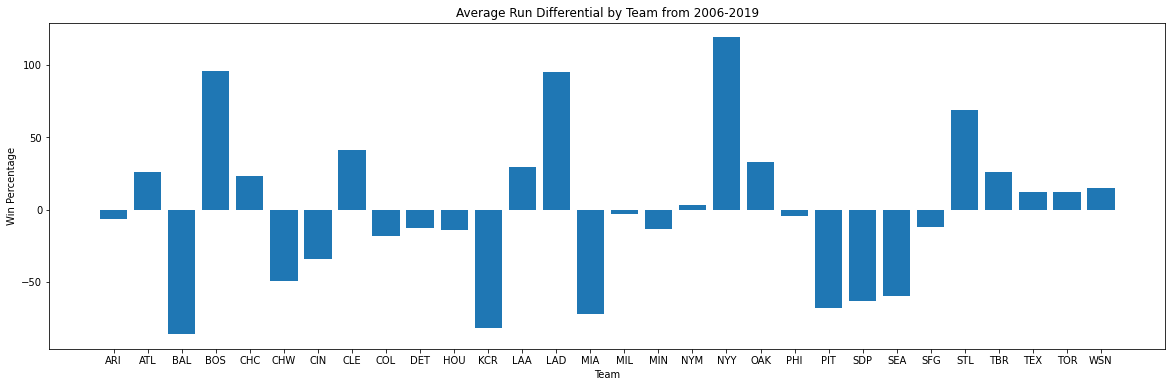

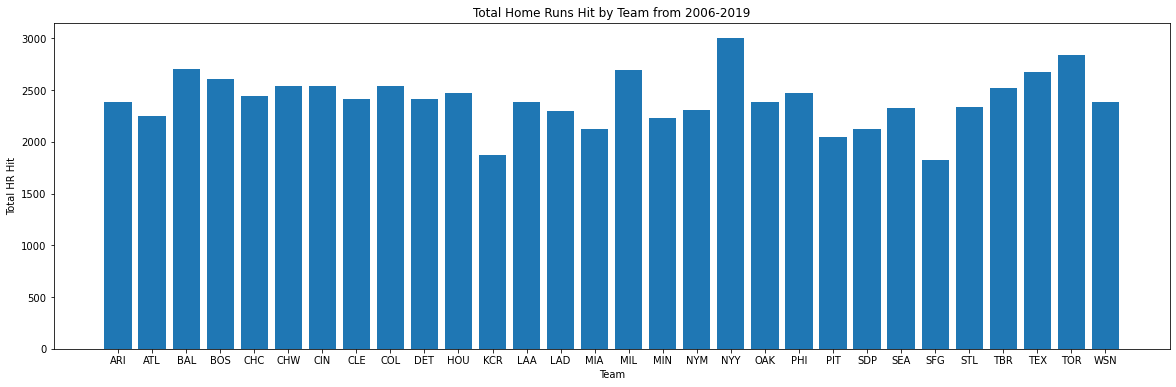

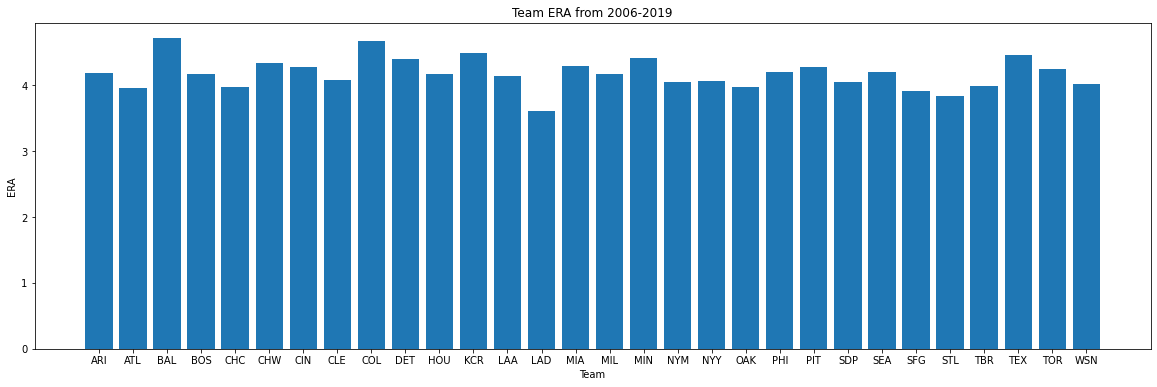

In [23]:
by_team = baseball_data.groupby(by='team')

win_pct_team = by_team['win_pct'].mean()
plt.figure(figsize = (20,6))
plt.bar(baseball_data.team.unique(), win_pct_team)
plt.xlabel('Team')
plt.ylabel('Win Percentage')
plt.title('Average Win Percentage by Team from 2006-2019')
plt.show()

run_diff_team = by_team['run_diff'].mean()
plt.figure(figsize = (20,6))
plt.bar(baseball_data.team.unique(), run_diff_team)
plt.xlabel('Team')
plt.ylabel('Win Percentage')
plt.title('Average Run Differential by Team from 2006-2019')
plt.show()

by_team = baseball_data.groupby(by='team')
team_tot_hr = by_team['hit_hr'].sum()
plt.figure(figsize = (20,6))
plt.bar(baseball_data.team.unique(), team_tot_hr)
plt.xlabel('Team')
plt.ylabel('Total HR Hit')
plt.title('Total Home Runs Hit by Team from 2006-2019')
plt.show()

by_team = baseball_data.groupby(by='team')
team_era_over_period = by_team['era'].mean()
plt.figure(figsize = (20,6))
plt.bar(baseball_data.team.unique(), team_era_over_period)
plt.xlabel('Team')
plt.ylabel('ERA')
plt.title('Team ERA from 2006-2019')
plt.show()

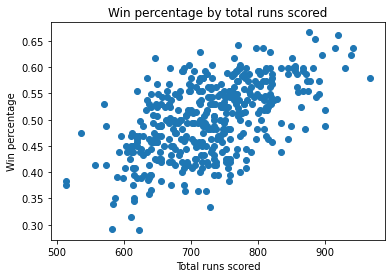

The correlation between runs scored and winning percentage is 0.565.


In [24]:
plt.scatter(baseball_data.runs_scored, baseball_data.win_pct)
plt.xlabel('Total runs scored')
plt.ylabel('Win percentage')
plt.title('Win percentage by total runs scored')
plt.show()

win_score_corr = baseball_data.corr().loc['runs_scored', 'win_pct']
print('The correlation between runs scored and winning percentage is {:.3f}.'.format(win_score_corr))

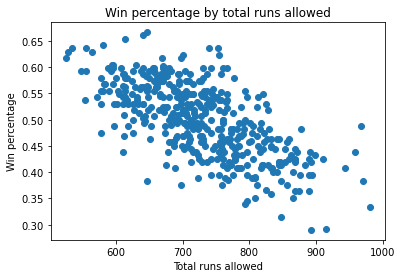

The correlation between runs allowed and winning percentage is -0.674.


In [33]:
plt.scatter(baseball_data.runs_allowed, baseball_data.win_pct)
plt.xlabel('Total runs allowed')
plt.ylabel('Win percentage')
plt.title('Win percentage by total runs allowed')
plt.show()

win_allow_corr = baseball_data.corr().loc['runs_allowed', 'win_pct']
print('The correlation between runs allowed and winning percentage is {:.3f}.'.format(win_allow_corr))

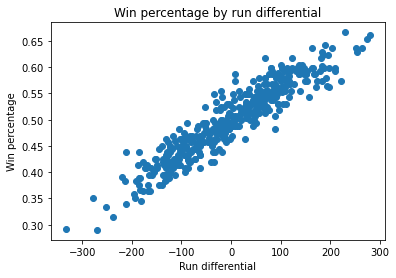

The correlation between run differential and winning percentage is 0.936.


In [34]:
plt.scatter(baseball_data.run_diff, baseball_data.win_pct)
plt.xlabel('Run differential')
plt.ylabel('Win percentage')
plt.title('Win percentage by run differential')
plt.show()

win_diff_corr = baseball_data.corr().loc['run_diff', 'win_pct']
print('The correlation between run differential and winning percentage is {:.3f}.'.format(win_diff_corr))

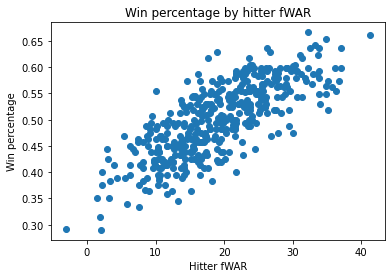

The correlation between hitter fWAR and winning percentage is 0.773.


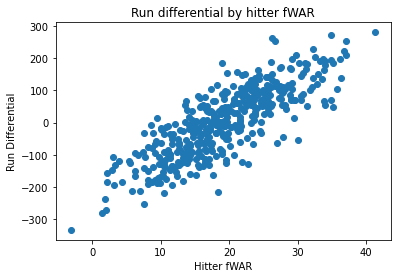

The correlation between hitter fWAR and run differential is 0.819.


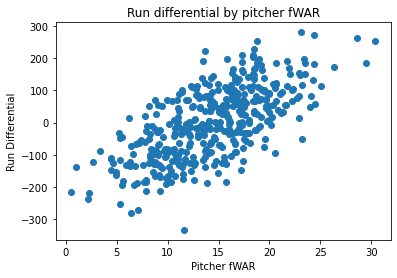

The correlation between pitcher fWAR and run differential is 0.675.


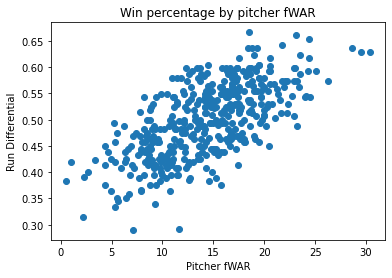

The correlation between pitcher fWAR and win percentage is 0.667.


In [35]:
plt.scatter(baseball_data.hit_fwar, baseball_data.win_pct)
plt.xlabel('Hitter fWAR')
plt.ylabel('Win percentage')
plt.title('Win percentage by hitter fWAR')
plt.show()

hit_war_win_corr = baseball_data.corr().loc['hit_fwar', 'win_pct']
print('The correlation between hitter fWAR and winning percentage is {:.3f}.'.format(hit_war_win_corr))

plt.scatter(baseball_data.hit_fwar, baseball_data.run_diff)
plt.xlabel('Hitter fWAR')
plt.ylabel('Run Differential')
plt.title('Run differential by hitter fWAR')
plt.show()

hit_war_diff_corr = baseball_data.corr().loc['hit_fwar', 'run_diff']
print('The correlation between hitter fWAR and run differential is {:.3f}.'.format(hit_war_diff_corr))

plt.scatter(baseball_data.pitch_fwar, baseball_data.run_diff)
plt.xlabel('Pitcher fWAR')
plt.ylabel('Run Differential')
plt.title('Run differential by pitcher fWAR')
plt.show()

pitch_war_diff_corr = baseball_data.corr().loc['pitch_fwar', 'run_diff']
print('The correlation between pitcher fWAR and run differential is {:.3f}.'.format(pitch_war_diff_corr))

plt.scatter(baseball_data.pitch_fwar, baseball_data.win_pct)
plt.xlabel('Pitcher fWAR')
plt.ylabel('Run Differential')
plt.title('Win percentage by pitcher fWAR')
plt.show()

pitch_war_win_corr = baseball_data.corr().loc['pitch_fwar', 'win_pct']
print('The correlation between pitcher fWAR and win percentage is {:.3f}.'.format(pitch_war_win_corr))

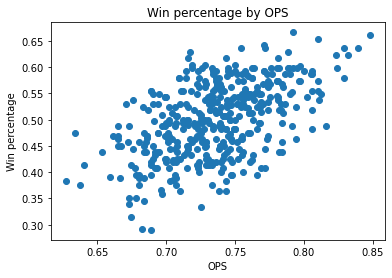

The correlation between ops and winning percentage is 0.535.


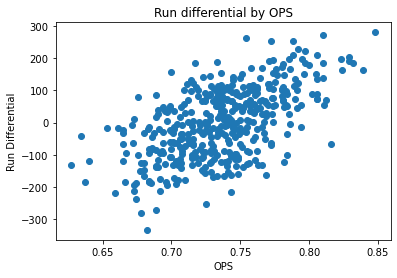

The correlation between ops and run differential is 0.585.


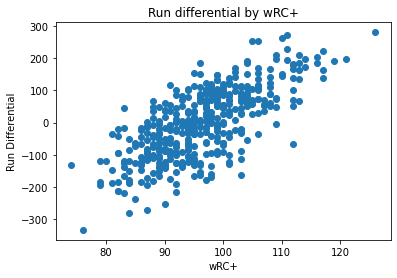

The correlation between wRC+ and run differential is 0.714.


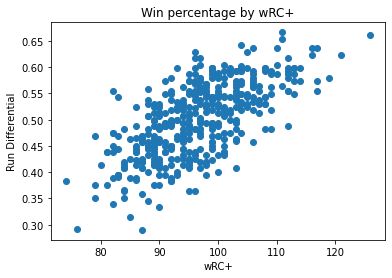

The correlation between wRC+ and win percentage is 0.667.


In [32]:
plt.scatter(baseball_data.ops, baseball_data.win_pct)
plt.xlabel('OPS')
plt.ylabel('Win percentage')
plt.title('Win percentage by OPS')
plt.show()

ops_win_corr = baseball_data.corr().loc['ops', 'win_pct']
print('The correlation between ops and winning percentage is {:.3f}.'.format(ops_win_corr))

plt.scatter(baseball_data.ops, baseball_data.run_diff)
plt.xlabel('OPS')
plt.ylabel('Run Differential')
plt.title('Run differential by OPS')
plt.show()

ops_diff_corr = baseball_data.corr().loc['ops', 'run_diff']
print('The correlation between ops and run differential is {:.3f}.'.format(ops_diff_corr))

plt.scatter(baseball_data.wrc_plus, baseball_data.run_diff)
plt.xlabel('wRC+')
plt.ylabel('Run Differential')
plt.title('Run differential by wRC+')
plt.show()

wrc_diff_corr = baseball_data.corr().loc['wrc_plus', 'run_diff']
print('The correlation between wRC+ and run differential is {:.3f}.'.format(wrc_diff_corr))

plt.scatter(baseball_data.wrc_plus, baseball_data.win_pct)
plt.xlabel('wRC+')
plt.ylabel('Run Differential')
plt.title('Win percentage by wRC+')
plt.show()

wrc_win_corr = baseball_data.corr().loc['wrc_plus', 'win_pct']
print('The correlation between wRC+ and win percentage is {:.3f}.'.format(wrc_win_corr))

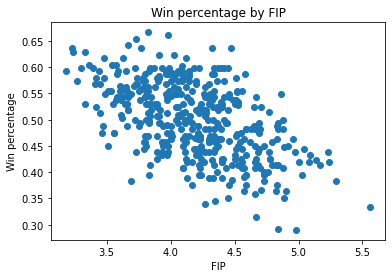

The correlation between FIP and winning percentage is -0.543.


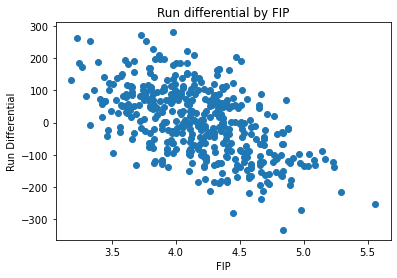

The correlation between FIP and run differential is -0.551.


In [28]:
plt.scatter(baseball_data.fip, baseball_data.win_pct)
plt.xlabel('FIP')
plt.ylabel('Win percentage')
plt.title('Win percentage by FIP')
plt.show()

fip_win_corr = baseball_data.corr().loc['fip', 'win_pct']
print('The correlation between FIP and winning percentage is {:.3f}.'.format(fip_win_corr))

plt.scatter(baseball_data.fip, baseball_data.run_diff)
plt.xlabel('FIP')
plt.ylabel('Run Differential')
plt.title('Run differential by FIP')
plt.show()

fip_diff_corr = baseball_data.corr().loc['fip', 'run_diff']
print('The correlation between FIP and run differential is {:.3f}.'.format(fip_diff_corr))

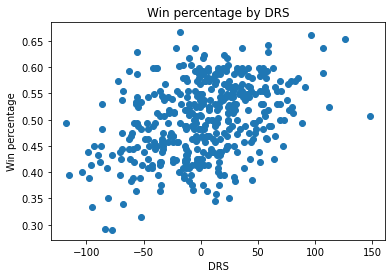

The correlation between DRS and winning percentage is 0.394.


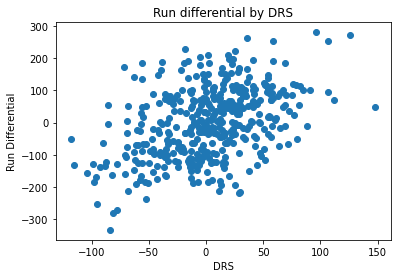

The correlation between DRS and run differential is 0.434.


In [29]:
plt.scatter(baseball_data.drs, baseball_data.win_pct)
plt.xlabel('DRS')
plt.ylabel('Win percentage')
plt.title('Win percentage by DRS')
plt.show()

drs_win_corr = baseball_data.corr().loc['drs', 'win_pct']
print('The correlation between DRS and winning percentage is {:.3f}.'.format(drs_win_corr))

plt.scatter(baseball_data.drs, baseball_data.run_diff)
plt.xlabel('DRS')
plt.ylabel('Run Differential')
plt.title('Run differential by DRS')
plt.show()

drs_diff_corr = baseball_data.corr().loc['drs', 'run_diff']
print('The correlation between DRS and run differential is {:.3f}.'.format(drs_diff_corr))

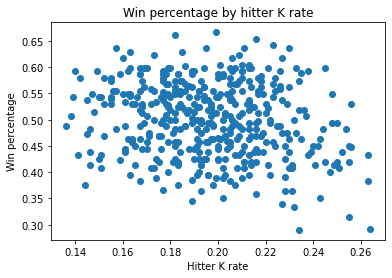

The correlation between hitter walk rate and winning percentage is 0.425.


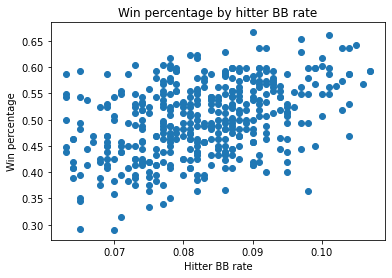

The correlation between hitter walk rate and winning percentage is 0.425.


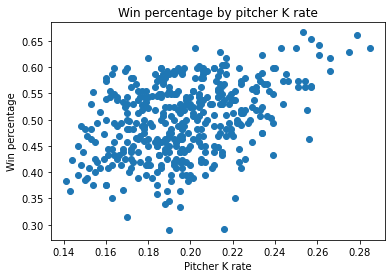

The correlation between pitcher strikeout rate and winning percentage is 0.407.


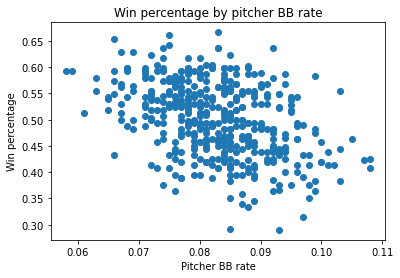

The correlation between pitcher walk rate and winning percentage is -0.405.


In [31]:
plt.scatter(baseball_data.hit_k_rate, baseball_data.win_pct)
plt.xlabel('Hitter K rate')
plt.ylabel('Win percentage')
plt.title('Win percentage by hitter K rate')
plt.show()

hit_k_rate_win_corr = baseball_data.corr().loc['hit_bb_rate', 'win_pct']
print('The correlation between hitter walk rate and winning percentage is {:.3f}.'.format(hit_k_rate_win_corr))

plt.scatter(baseball_data.hit_bb_rate, baseball_data.win_pct)
plt.xlabel('Hitter BB rate')
plt.ylabel('Win percentage')
plt.title('Win percentage by hitter BB rate')
plt.show()

hit_bb_rate_win_corr = baseball_data.corr().loc['hit_bb_rate', 'win_pct']
print('The correlation between hitter walk rate and winning percentage is {:.3f}.'.format(hit_bb_rate_win_corr))

plt.scatter(baseball_data.pitch_k_rate, baseball_data.win_pct)
plt.xlabel('Pitcher K rate')
plt.ylabel('Win percentage')
plt.title('Win percentage by pitcher K rate')
plt.show()

pitch_k_rate_win_corr = baseball_data.corr().loc['pitch_k_rate', 'win_pct']
print('The correlation between pitcher strikeout rate and winning percentage is {:.3f}.'.format(pitch_k_rate_win_corr))

plt.scatter(baseball_data.pitch_bb_rate, baseball_data.win_pct)
plt.xlabel('Pitcher BB rate')
plt.ylabel('Win percentage')
plt.title('Win percentage by pitcher BB rate')
plt.show()

pitch_bb_rate_win_corr = baseball_data.corr().loc['pitch_bb_rate', 'win_pct']
print('The correlation between pitcher walk rate and winning percentage is {:.3f}.'.format(pitch_bb_rate_win_corr))

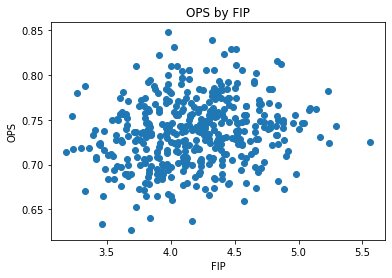

The correlation between FIP and OPS is 0.186.


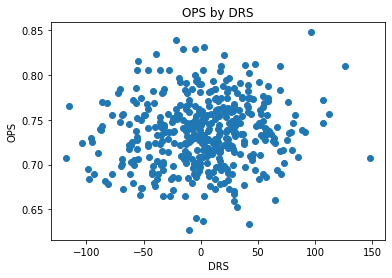

The correlation between FIP and OPS is -0.164.


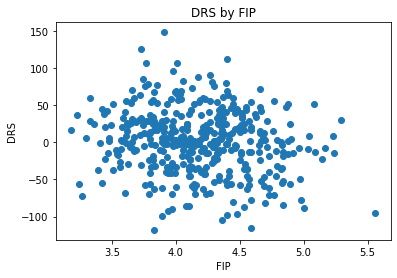

The correlation between FIP and OPS is -0.164.


In [34]:
plt.scatter(baseball_data.fip, baseball_data.ops)
plt.xlabel('FIP')
plt.ylabel('OPS')
plt.title('OPS by FIP')
plt.show()

fip_ops_corr = baseball_data.corr().loc['fip', 'ops']
print('The correlation between FIP and OPS is {:.3f}.'.format(fip_ops_corr))

plt.scatter(baseball_data.drs, baseball_data.ops)
plt.xlabel('DRS')
plt.ylabel('OPS')
plt.title('OPS by DRS')
plt.show()

drs_ops_corr = baseball_data.corr().loc['fip', 'drs']
print('The correlation between FIP and OPS is {:.3f}.'.format(drs_ops_corr))

plt.scatter(baseball_data.fip, baseball_data.drs)
plt.xlabel('FIP')
plt.ylabel('DRS')
plt.title('DRS by FIP')
plt.show()

fip_drs_corr = baseball_data.corr().loc['fip', 'drs']
print('The correlation between FIP and OPS is {:.3f}.'.format(fip_drs_corr))

### Questions for Reviewers